In [2]:
import pickle
import argparse
from utils import get_data, plot_prob_result,seed_everything
import copy
import pandas as pd
# Load the server object
import torch
from torch.nn import MSELoss
import numpy as np
from torch.nn import L1Loss
scale=24

with open('../result/24/server.pkl', 'rb') as f:
    server = pickle.load(f)

# Load the clients object
with open('../result/24/clients.pkl', 'rb') as f:
    clients = pickle.load(f)

In [3]:
server

In [5]:
fed_local_proposed_losses=[]
fed_local_proposed_preds=[]
fed_local_proposed_models=[]
for i in range(7):
    fed_local_proposed_pred,fed_local_proposed_loss,fed_local_proposed_model=clients[i].fed_local_evaluation()
    fed_local_proposed_losses.append(fed_local_proposed_loss[server.index_set[i]])
    fed_local_proposed_preds.append(fed_local_proposed_pred[server.index_set[i]])
    fed_local_proposed_models.append(fed_local_proposed_model[server.index_set[i]])
print(fed_local_proposed_losses)

[0.07223644668925298, 0.08466056167875251, 0.09076731196566395, 0.08110292202295506, 0.08223103012328278, 0.0757141739053473, 0.09013798964299159]


In [3]:
ewc=[]
for fine_tune_epochs in [20, 50]:
    local_fine_tune_ewc_losses=[]
    local_fine_tune_ewc_preds=[]
    local_fine_tune_ewc_models=[]
    seed_everything(1)
    for i in range(7):
        local_fine_tune_ewc_pred,local_fine_tune_ewc_loss,local_fine_tune_ewc_model=clients[i].local_fine_tune(server.index_set[i],ewc_flag=True,importance=0.02,fine_tune_epochs=fine_tune_epochs,patience=fine_tune_epochs)
        local_fine_tune_ewc_losses.append(local_fine_tune_ewc_loss)
        local_fine_tune_ewc_preds.append(local_fine_tune_ewc_pred)
        local_fine_tune_ewc_models.append(local_fine_tune_ewc_model)
    print(local_fine_tune_ewc_losses)
    ewc.append(local_fine_tune_ewc_losses)

1e-05 0
self.importance 0.02
Epoch [1/20] Train Loss: 0.0567 Val Loss: 0.0578
Epoch [2/20] Train Loss: 0.0561 Val Loss: 0.0572
Epoch [3/20] Train Loss: 0.0557 Val Loss: 0.0569
Epoch [4/20] Train Loss: 0.0555 Val Loss: 0.0567
Epoch [5/20] Train Loss: 0.0553 Val Loss: 0.0567
Epoch [6/20] Train Loss: 0.0553 Val Loss: 0.0565
Epoch [7/20] Train Loss: 0.0552 Val Loss: 0.0564
Epoch [8/20] Train Loss: 0.0552 Val Loss: 0.0564
Epoch [9/20] Train Loss: 0.0551 Val Loss: 0.0563
Epoch [10/20] Train Loss: 0.0551 Val Loss: 0.0564
Epoch [11/20] Train Loss: 0.0550 Val Loss: 0.0564
Epoch [12/20] Train Loss: 0.0550 Val Loss: 0.0562
Epoch [13/20] Train Loss: 0.0550 Val Loss: 0.0563
Epoch [14/20] Train Loss: 0.0549 Val Loss: 0.0562
Epoch [15/20] Train Loss: 0.0550 Val Loss: 0.0561
Epoch [16/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [17/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [18/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [19/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [20/20] Train Loss: 0.05

In [27]:
ewc=[]
for lr in [1e-5,1e-4,1e-3]:
    ewc_temp=[]
    for fine_tune_epochs in [20, 50, 100,150,200]:
        local_fine_tune_ewc_losses=[]
        local_fine_tune_ewc_preds=[]
        local_fine_tune_ewc_models=[]
        seed_everything(1)
        for i in range(7):
            local_fine_tune_ewc_pred,local_fine_tune_ewc_loss,local_fine_tune_ewc_model=clients[i].local_fine_tune(server.index_set[i],ewc_flag=True,importance=0.02,fine_tune_epochs=fine_tune_epochs,patience=fine_tune_epochs,fine_tune_lr=lr)
            local_fine_tune_ewc_losses.append(local_fine_tune_ewc_loss)
            local_fine_tune_ewc_preds.append(local_fine_tune_ewc_pred)
            local_fine_tune_ewc_models.append(local_fine_tune_ewc_model)
        print(local_fine_tune_ewc_losses)
        ewc_temp.append(local_fine_tune_ewc_losses)
        print(ewc_temp)
    ewc.append(ewc_temp)

1e-05 0
self.importance 0.02
Epoch [1/20] Train Loss: 0.0567 Val Loss: 0.0578
Epoch [2/20] Train Loss: 0.0561 Val Loss: 0.0572
Epoch [3/20] Train Loss: 0.0557 Val Loss: 0.0569
Epoch [4/20] Train Loss: 0.0555 Val Loss: 0.0567
Epoch [5/20] Train Loss: 0.0553 Val Loss: 0.0567
Epoch [6/20] Train Loss: 0.0553 Val Loss: 0.0565
Epoch [7/20] Train Loss: 0.0552 Val Loss: 0.0564
Epoch [8/20] Train Loss: 0.0552 Val Loss: 0.0564
Epoch [9/20] Train Loss: 0.0551 Val Loss: 0.0563
Epoch [10/20] Train Loss: 0.0551 Val Loss: 0.0564
Epoch [11/20] Train Loss: 0.0550 Val Loss: 0.0564
Epoch [12/20] Train Loss: 0.0550 Val Loss: 0.0562
Epoch [13/20] Train Loss: 0.0550 Val Loss: 0.0563
Epoch [14/20] Train Loss: 0.0549 Val Loss: 0.0562
Epoch [15/20] Train Loss: 0.0550 Val Loss: 0.0561
Epoch [16/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [17/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [18/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [19/20] Train Loss: 0.0549 Val Loss: 0.0561
Epoch [20/20] Train Loss: 0.05

In [ ]:
noewc=[]
for lr in [1e-5,1e-4,1e-3]:
    no_ewc_temp=[]
    for fine_tune_epochs in [20, 50, 100,150,200]:
        local_fine_tune_noewc_losses=[]
        local_fine_tune_noewc_preds=[]
        local_fine_tune_noewc_models=[]
        seed_everything(1)
        for i in range(7):
            local_fine_tune_noewc_pred,local_fine_tune_noewc_loss,local_fine_tune_noewc_model=clients[i].local_fine_tune(server.index_set[i],ewc_flag=False,importance=0.02,fine_tune_epochs=fine_tune_epochs,patience=fine_tune_epochs,fine_tune_lr=lr)
            local_fine_tune_noewc_losses.append(local_fine_tune_noewc_loss)
            local_fine_tune_noewc_preds.append(local_fine_tune_noewc_pred)
            local_fine_tune_noewc_models.append(local_fine_tune_noewc_model)
        print(local_fine_tune_noewc_losses)
        no_ewc_temp.append(local_fine_tune_noewc_losses)
        print(no_ewc_temp)
    noewc.append(no_ewc_temp)

In [31]:
import pickle

with open('result.pkl', 'wb') as f:
    pickle.dump(ewc, f)

In [32]:
import pickle

with open('result_no_ewc.pkl', 'wb') as f:
    pickle.dump(noewc, f)

In [9]:
'''with open('result_no_ewc.pkl', 'rb') as f:
    noewc = pickle.load(f)

with open('result.pkl', 'rb') as f:
    ewc = pickle.load(f)'''

In [10]:
print(np.mean(noewc[0],axis=1))
print(np.mean(noewc[1],axis=1))
print(np.mean(noewc[2],axis=1))

print(np.mean(ewc[0],axis=1))
print(np.mean(ewc[1],axis=1))
print(np.mean(ewc[2],axis=1))

noewc_figure_data=[list(np.mean(noewc[0],axis=1)),list(np.mean(noewc[1],axis=1)),list(np.mean(noewc[2],axis=1))]
ewc_figure_data=[list(np.mean(ewc[0],axis=1)),list(np.mean(ewc[1],axis=1)),list(np.mean(ewc[2],axis=1))]

[0.0792661  0.07982517 0.08068305 0.08123743 0.08170826]
[0.08006991 0.08312154 0.08630385 0.08844178 0.0906702 ]
[0.07921375 0.08686659 0.09290128 0.09708089 0.09683448]
[0.07915284 0.07925432 0.07924236 0.07945652 0.07951553]
[0.07915901 0.0791374  0.0794754  0.07977127 0.07989125]
[0.07846427 0.07878593 0.07854946 0.07809639 0.07789026]


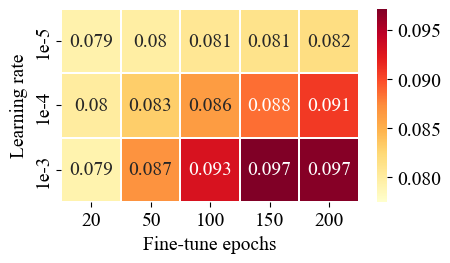

In [11]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['font.size'] = 14

plt.figure(figsize=(4.8, 2.5)) 
sns.heatmap(np.array(noewc_figure_data), cmap='YlOrRd', annot=True, linewidths=0.025, vmin=0.0775)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=[20, 50, 100, 150, 200])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['1e-5','1e-4','1e-3'])
plt.xlabel('Fine-tune epochs')
plt.ylabel('Learning rate')
plt.savefig('heatmap_no_ewc.png', bbox_inches='tight', dpi=1000)
plt.show()

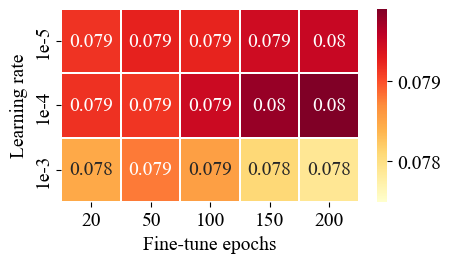

In [13]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['font.size'] = 14

plt.figure(figsize=(4.8, 2.5)) 
sns.heatmap(np.array(ewc_figure_data), cmap='YlOrRd', annot=True, linewidths=0.025, vmin=0.0775)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=[20, 50, 100, 150, 200])
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=['1e-5','1e-4','1e-3'])
plt.xlabel('Fine-tune epochs')
plt.ylabel('Learning rate')
plt.savefig('../Figure/heatmap_ewc.png', bbox_inches='tight', dpi=1000)
plt.show()

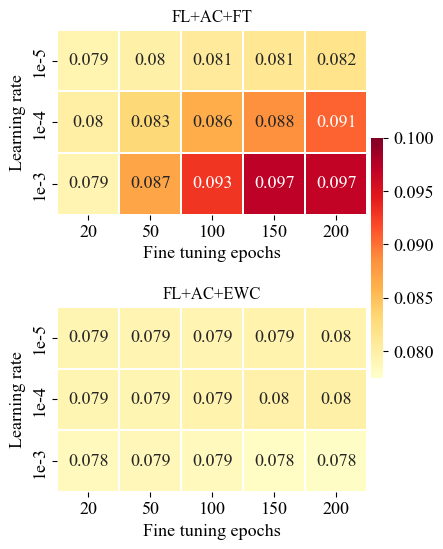

In [15]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['font.size'] = 13

fig, axs = plt.subplots(2, 1, figsize=(4, 6), sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

sns.heatmap(np.array(noewc_figure_data), cmap='YlOrRd', annot=True, linewidths=0.025, vmin=0.0775, vmax=0.1, ax=axs[0], cbar=False)
sns.heatmap(np.array(ewc_figure_data), cmap='YlOrRd', annot=True, linewidths=0.025, vmin=0.0775, vmax=0.1, ax=axs[1], cbar_ax=cbar_ax)


axs[0].set_xticks([0.5, 1.5, 2.5, 3.5, 4.5])
axs[0].set_xticklabels([20, 50, 100, 150, 200])
axs[0].set_yticks([0.5, 1.5, 2.5])
axs[0].set_yticklabels(['1e-5','1e-4','1e-3'])
axs[0].set_xlabel('Fine tuning epochs')
axs[0].set_ylabel('Learning rate')

axs[1].set_xticks([0.5, 1.5, 2.5, 3.5, 4.5])
axs[1].set_xticklabels([20, 50, 100, 150, 200])
axs[1].set_xlabel('Fine tuning epochs')
axs[1].set_ylabel('Learning rate')

axs[0].set_title('FL+AC+FT',size=12)
axs[1].set_title('FL+AC+EWC',size=12)

plt.subplots_adjust(hspace=0.5)
plt.savefig('../Figure/heatmap.png', bbox_inches='tight', dpi=1000)
plt.show()